In [2]:
from src.main import *
import matplotlib.pyplot as plt
import numpy as np

In [3]:
report_11 = Report('src/data/2011-world-copper-2063-trade.json', '2011')
report_12 = Report('src/data/2012-world-copper-2063-trade.json', '2012')
report_13 = Report('src/data/2013-world-copper-2063-trade.json', '2013')
report_14 = Report('src/data/2014-world-copper-2063-trade.json', '2014')
report_15 = Report('src/data/2015-world-copper-2063-trade.json', '2015')

report_16 = Report('src/data/format-2016-world-copper-2063-trade.json', '2016')
report_17 = Report('src/data/format-2017-world-copper-2063-trade.json', '2017')
report_18 = Report('src/data/format-2018-world-copper-2063-trade.json', '2018')
report_19 = Report('src/data/2019-world-copper-2063-trade.csv', '2019')
report_20 = Report('src/data/format-2020-world-copper-2063-trade.json', '2020')


In [5]:
reports = [
    report_11, report_12, report_13, report_14, report_15,
    report_16, report_17, report_18, report_19, report_20
]

"""
for report in reports:
    write_to_excel(report.data_overview(), 'excel/' +
                   report.name + '_copper_2063_trade.xlsx')
"""


def batch_fn(inject, **args):
    for report in reports:
        inject(report, **args)


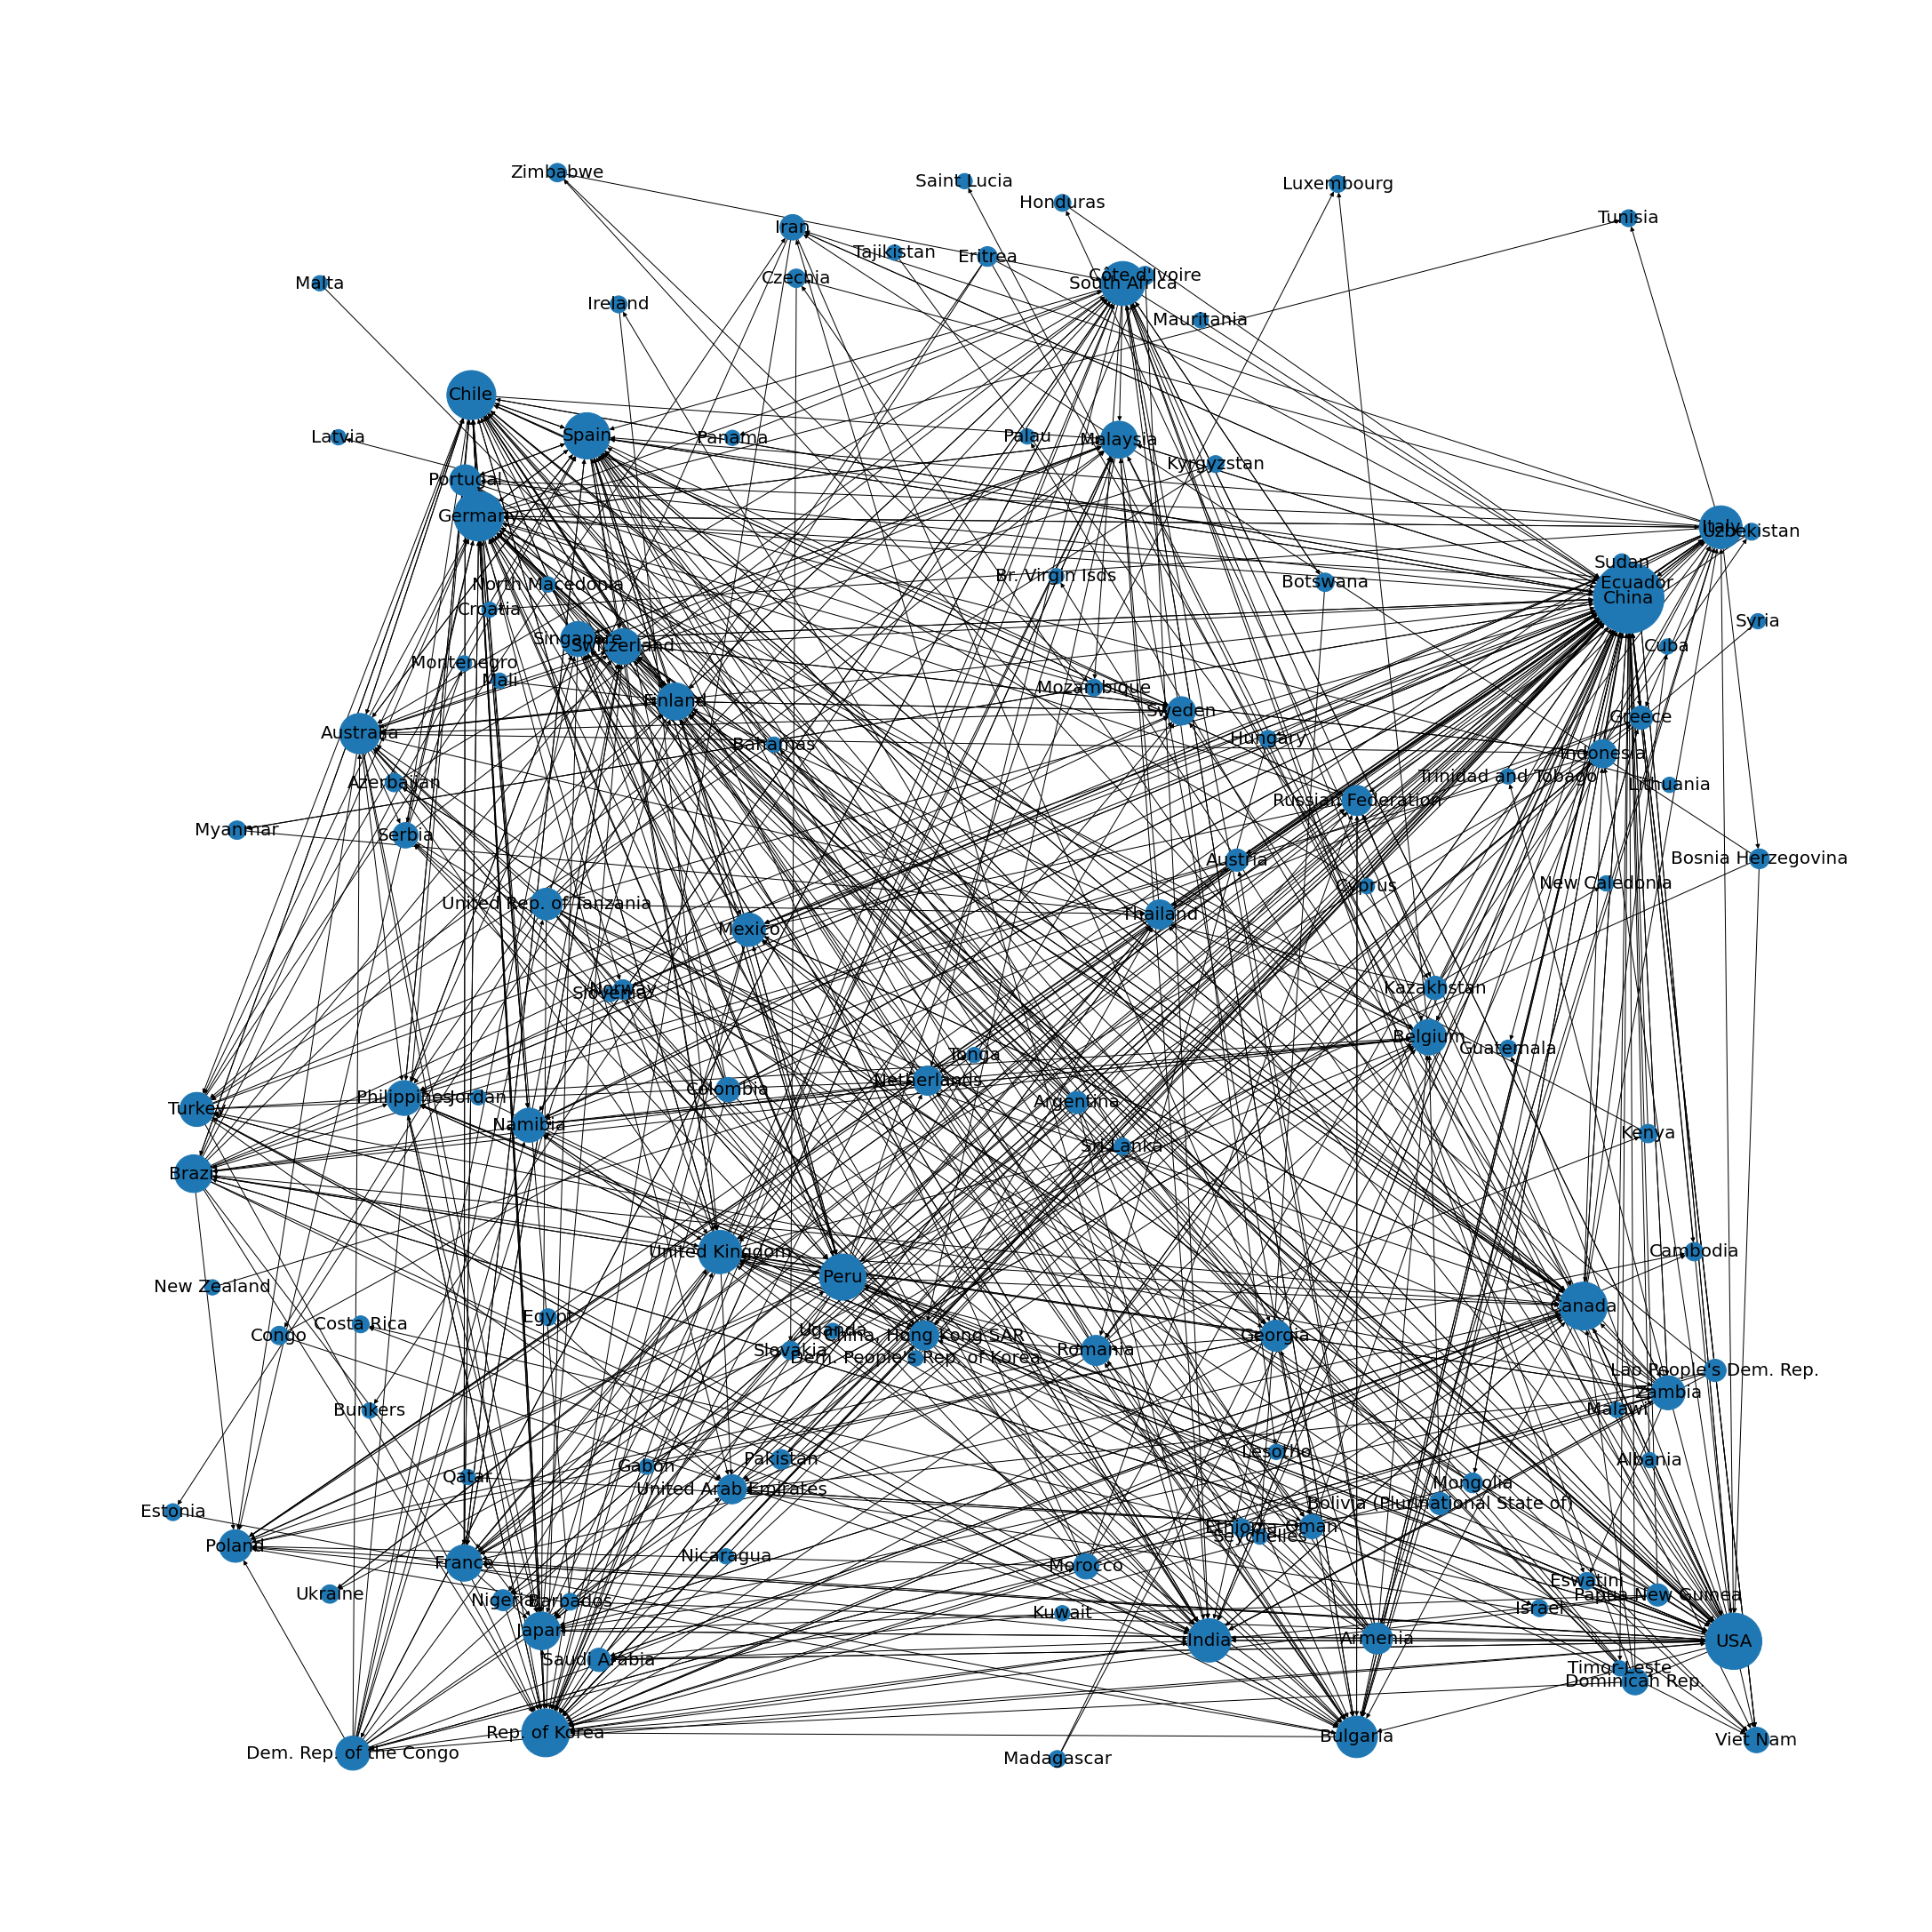

In [6]:
report_17.net.draw()

In [7]:
overview = report_16.data_overview()
# write_to_excel(overview, 'excel/t1_data_overview_16.xlsx')
overview

Reporter Code   Reporter  Partner Code         Partner Trade Flow  Trade Value (US$)
1                32  Argentina           100        Bulgaria     Export           20025236
2                32  Argentina           246         Finland     Export          137876595
3                32  Argentina           276         Germany     Export          155770517
4                32  Argentina           392           Japan     Export          145075089
5                32  Argentina           699           India     Export           36485970
...             ...        ...           ...             ...        ...                ...
1198            894     Zambia           804         Ukraine     Export                  2
1199            894     Zambia           826  United Kingdom     Export             187697
1202            716   Zimbabwe            36       Australia     Export                 50
1203            716   Zimbabwe           710    South Africa     Export            1100002
1204            716   Zimbabwe           710    South Africa  Re-Export            1100000

[928 rows x 6 columns]

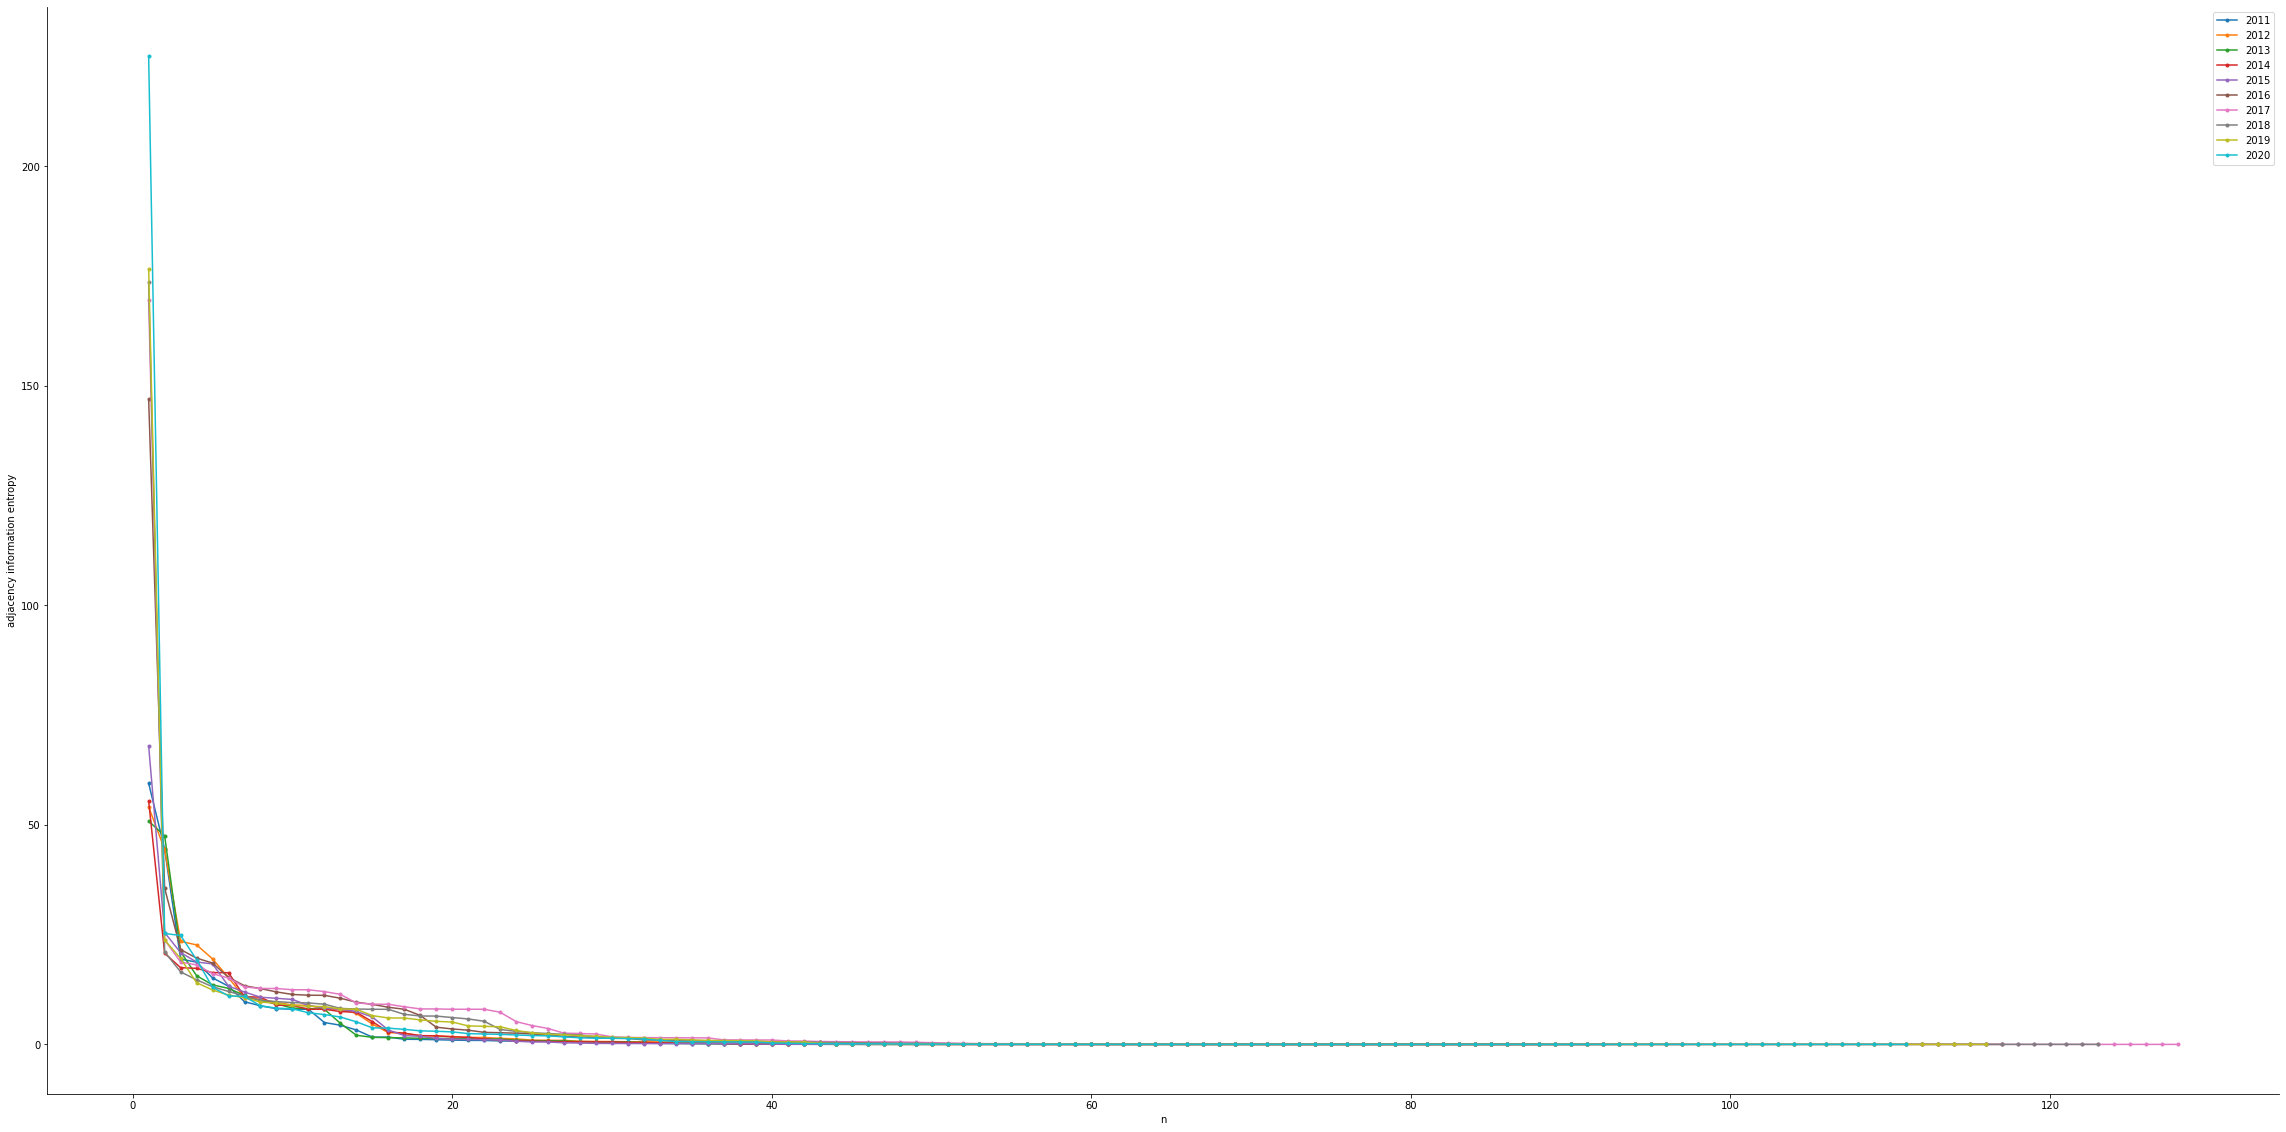

In [8]:
def draw_entropy_plots(slice=None):
    fig, axes = plt.subplots(figsize=(40, 20))
    y_label = "adjacency information entropy"

    def draw_entropy_plot(report, axes):
        nodes = report.net.sortedNodes
        x = np.arange(len(nodes)) + 1
        y = [node['E'] for node in nodes]
        axes.spines['right'].set_visible(False)
        axes.spines['top'].set_visible(False)
        if slice is None:
            axes.plot(x, y, '.-', label=report.name)
        else:
            axes.plot(x[slice[0]: slice[1]], y[slice[0]: slice[1]],
                      '-', label=report.name)

    batch_fn(draw_entropy_plot, axes=axes)

    axes.legend()
    axes.set_xlabel('n')
    axes.set_ylabel(y_label)


draw_entropy_plots()


In [6]:
for report in reports:
    report.cluster_nodes()

In [7]:
table_entropy_cluster= show_cluster_list(reports)
table_entropy_cluster.head()
# write_to_excel(table_entropy_cluster, 'excel/entropy_cluster.xlsx')


code                  code                              code                  code                    code
label                                                                                                                            
1                       156                   156                               156                   156                     156
2                        97                    97                                97                   152          97,124,975,724
3                       528   410,724,100,152,784                       410,975,152                   724                     276
4                   124,410    276,699,975,604,36       276,724,100,710,392,757,604  410,276,116,100,等12项  410,842,392,76,152,860
5      100,276,152,724,等13项  124,826,842,392,等10项  124,36,842,699,826,76,268,376,48  124,528,710,458,等13项              268,36,604

In [8]:
nodes_attribute_16 = report_16.show_nodes_attribute()
# write_to_excel(nodes_attribute_16, 'excel/t2_attributes_2016.xlsx')


In [9]:
for report in reports:
    report.set_attribute_probability()


In [27]:
decision_list_16 = pd.DataFrame(report_16.decision_list)[
    report_16.attribute_names + ['label']]\
    .sort_values('label')\
    .reset_index(drop=True)
write_to_excel(decision_list_16, 'excel/t4_decision_list_2016.xlsx')
print(decision_list_16)


     IS   OS  DC   BC   CC  label
0   NaN  NaN   1  NaN  NaN      1
1   NaN  NaN   2  NaN  NaN      2
2   6.0  NaN   4  4.0  6.0      3
3   6.0  NaN   4  4.0  5.0      3
4   6.0  NaN   4  4.0  4.0      3
5   6.0  NaN   4  4.0  1.0      3
6   6.0  NaN   4  4.0  2.0      3
7   3.0  NaN   4  NaN  1.0      4
8   3.0  NaN   4  NaN  2.0      4
9   3.0  NaN   4  NaN  4.0      4
10  3.0  NaN   4  NaN  5.0      4
11  3.0  NaN   4  NaN  6.0      4
12  5.0  NaN   3  NaN  NaN      4
13  6.0  NaN   3  NaN  NaN      5
14  NaN  NaN   6  4.0  NaN      5
15  6.0  NaN   4  6.0  NaN      5
16  6.0  5.0   4  5.0  NaN      5
17  6.0  4.0   4  5.0  NaN      5
18  6.0  3.0   4  5.0  NaN      5
19  6.0  2.0   4  5.0  NaN      5
20  6.0  1.0   4  5.0  NaN      5
21  2.0  NaN   3  NaN  NaN      5
22  3.0  NaN   3  NaN  NaN      5
23  1.0  NaN   3  NaN  NaN      5
24  4.0  NaN   3  NaN  NaN      5
25  6.0  NaN   4  3.0  NaN      5
26  6.0  NaN   4  2.0  NaN      5
27  6.0  NaN   4  1.0  NaN      5
28  5.0  NaN  

In [29]:
decision_attribute_distribute = get_decision_attribute_distribute(reports)
# write_to_excel(decision_attribute_distribute, 'excel/t5_decision_attribute_distribute.xlsx')
decision_attribute_distribute

2016      2017      2018      2019      2020
IS  0.695652  0.666667  0.424242  0.744186  0.717391
OS  0.130435  0.348485  0.424242  0.209302  0.586957
DC  1.000000  1.000000  1.000000  1.000000  1.000000
BC  0.586957  0.393939  0.424242  0.686047  0.130435
CC  0.391304  0.515152  0.500000  0.406977  0.369565

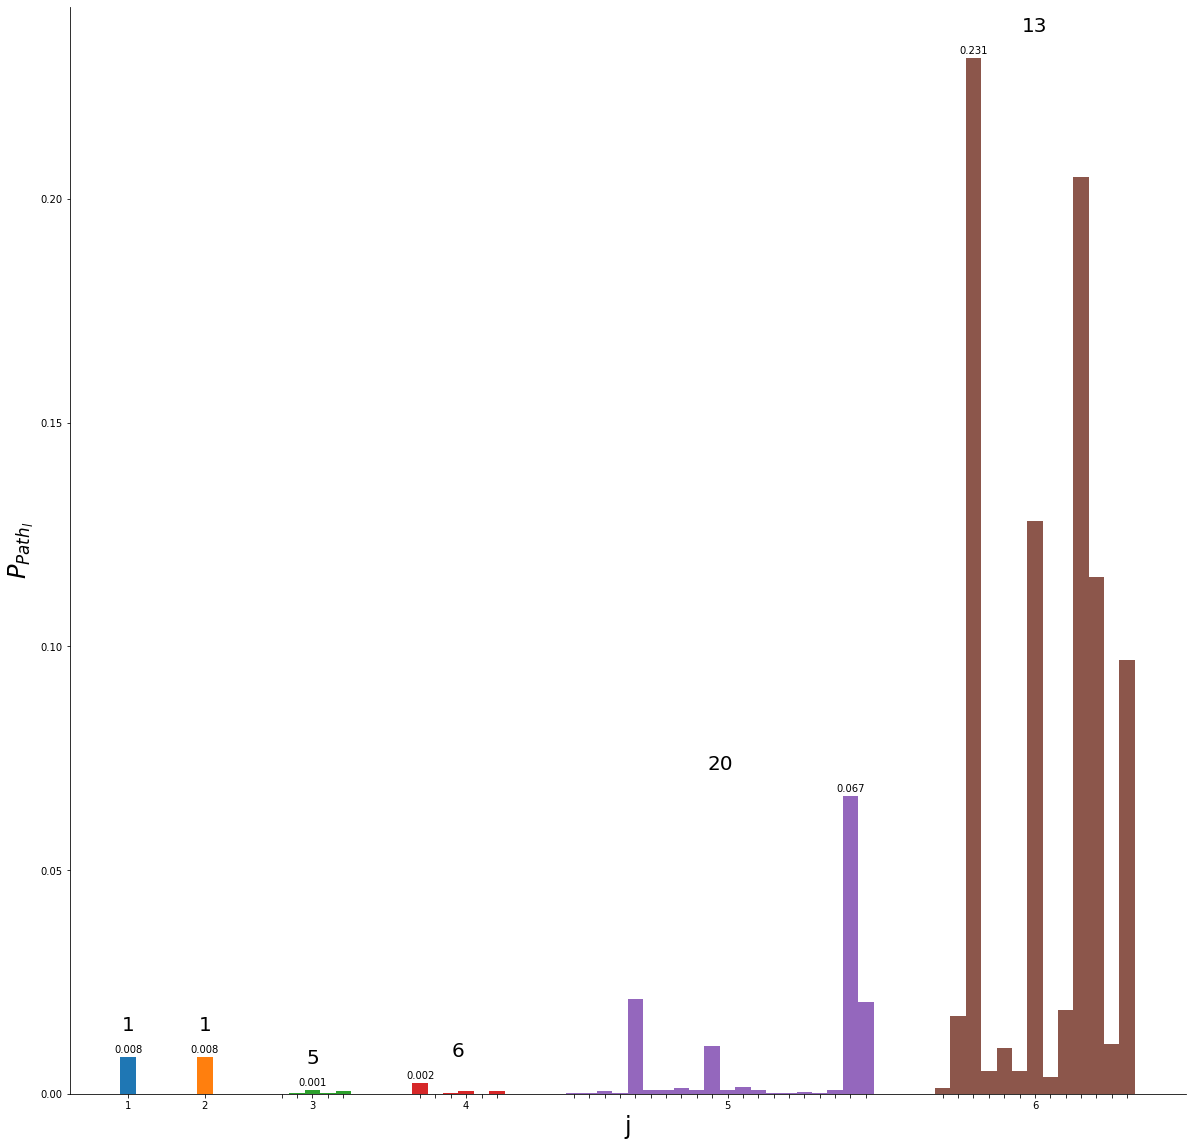

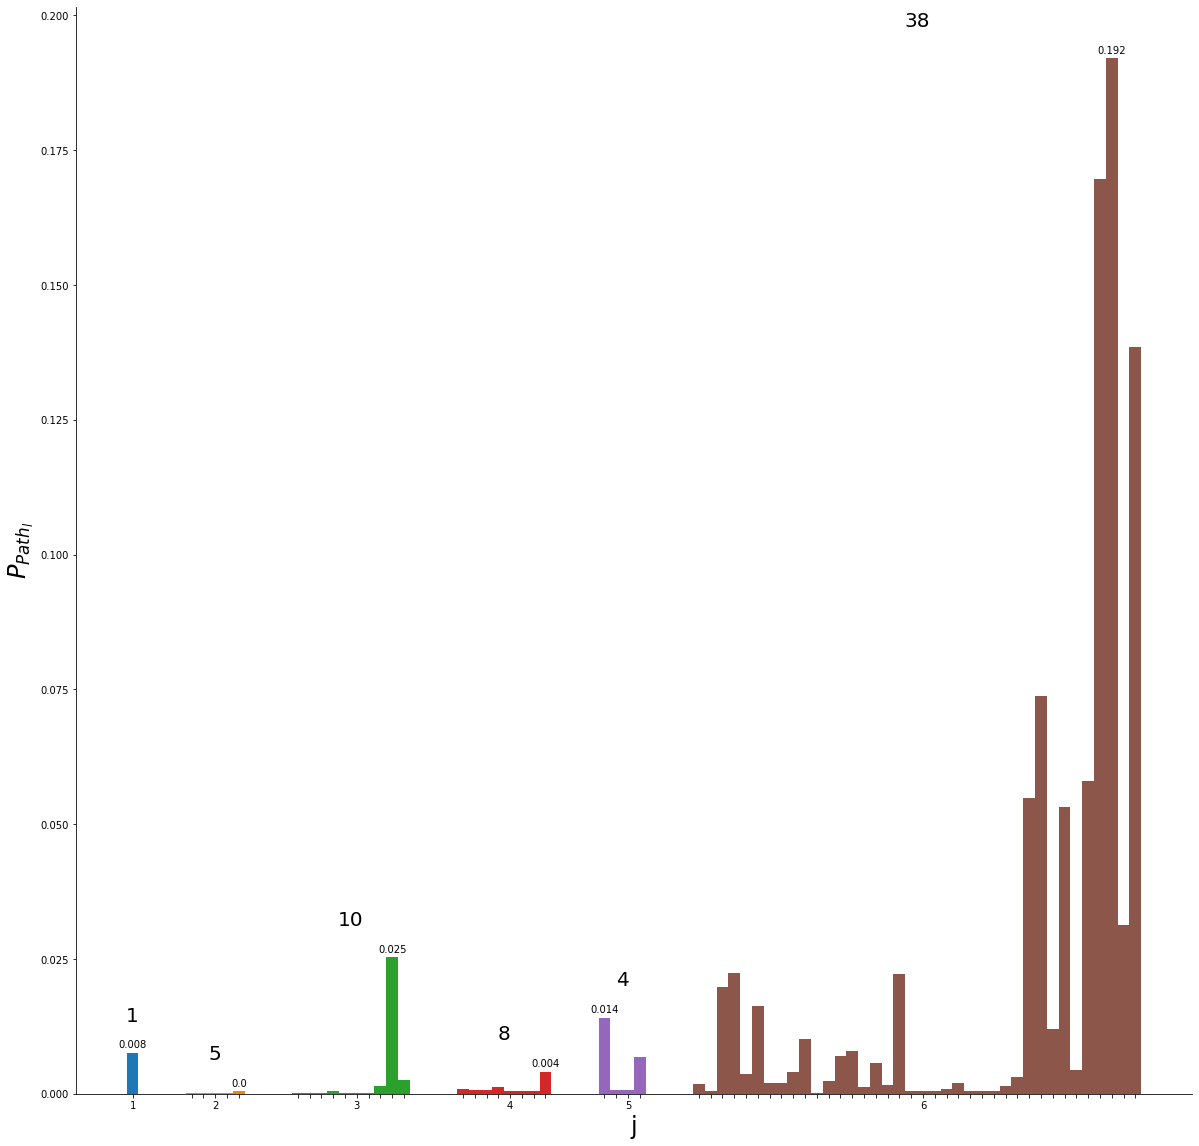

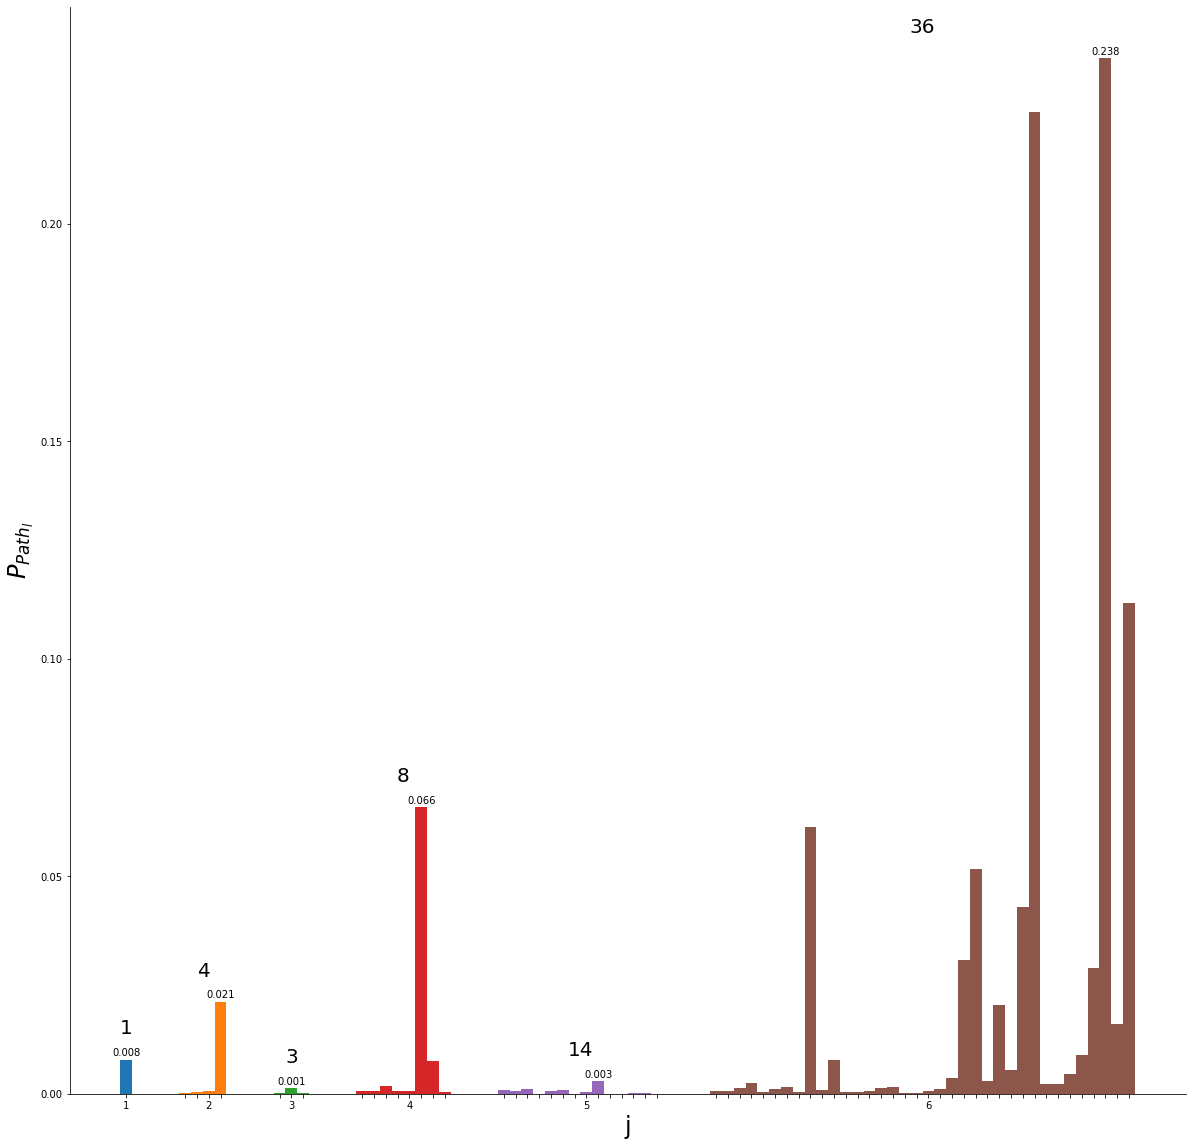

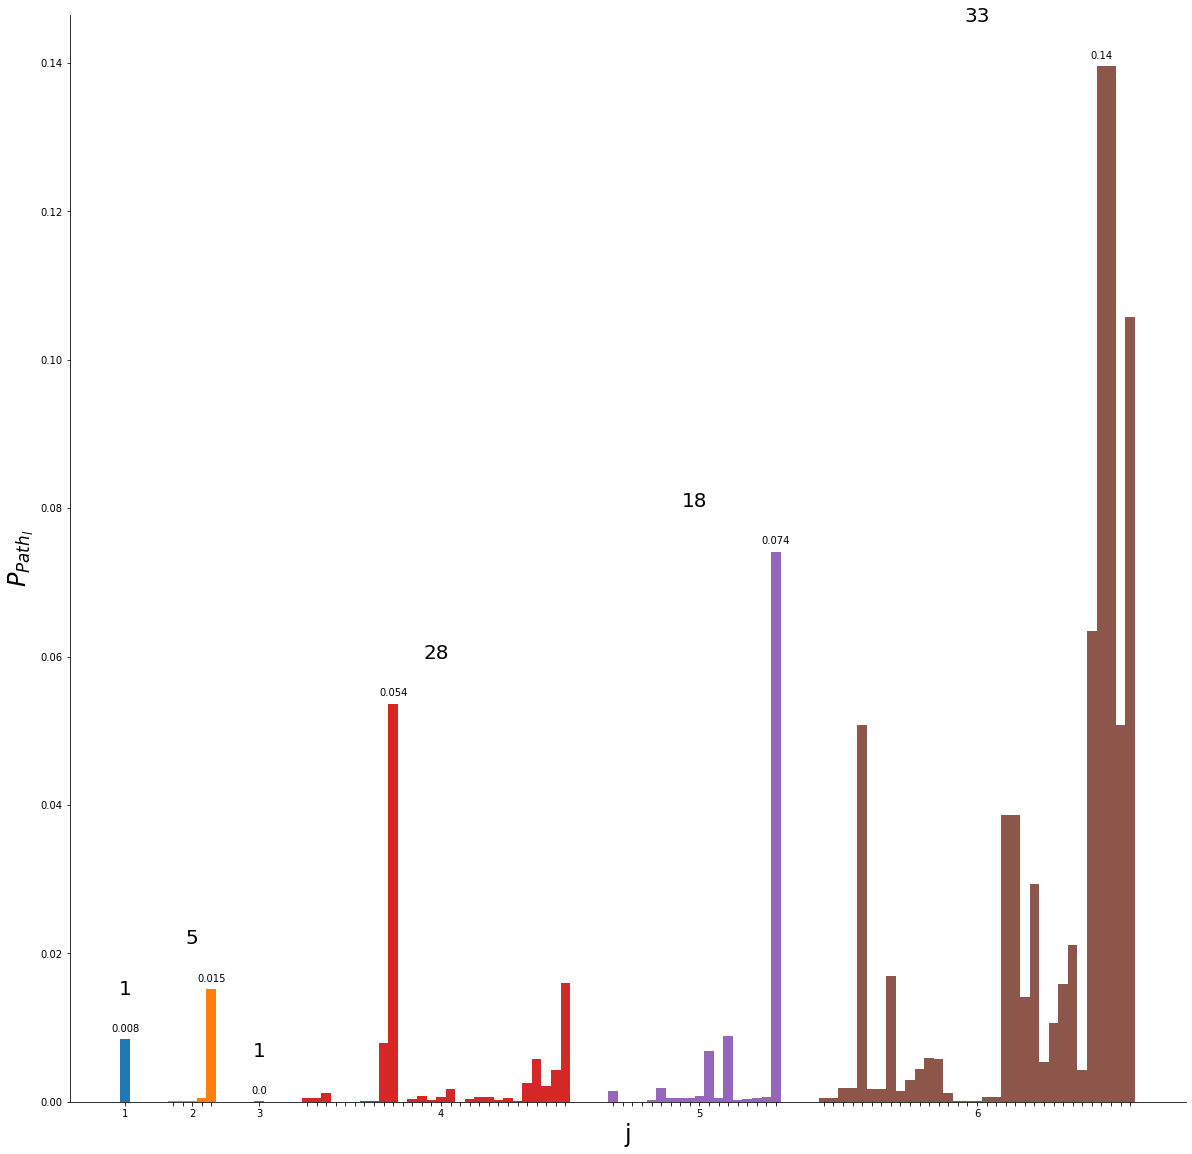

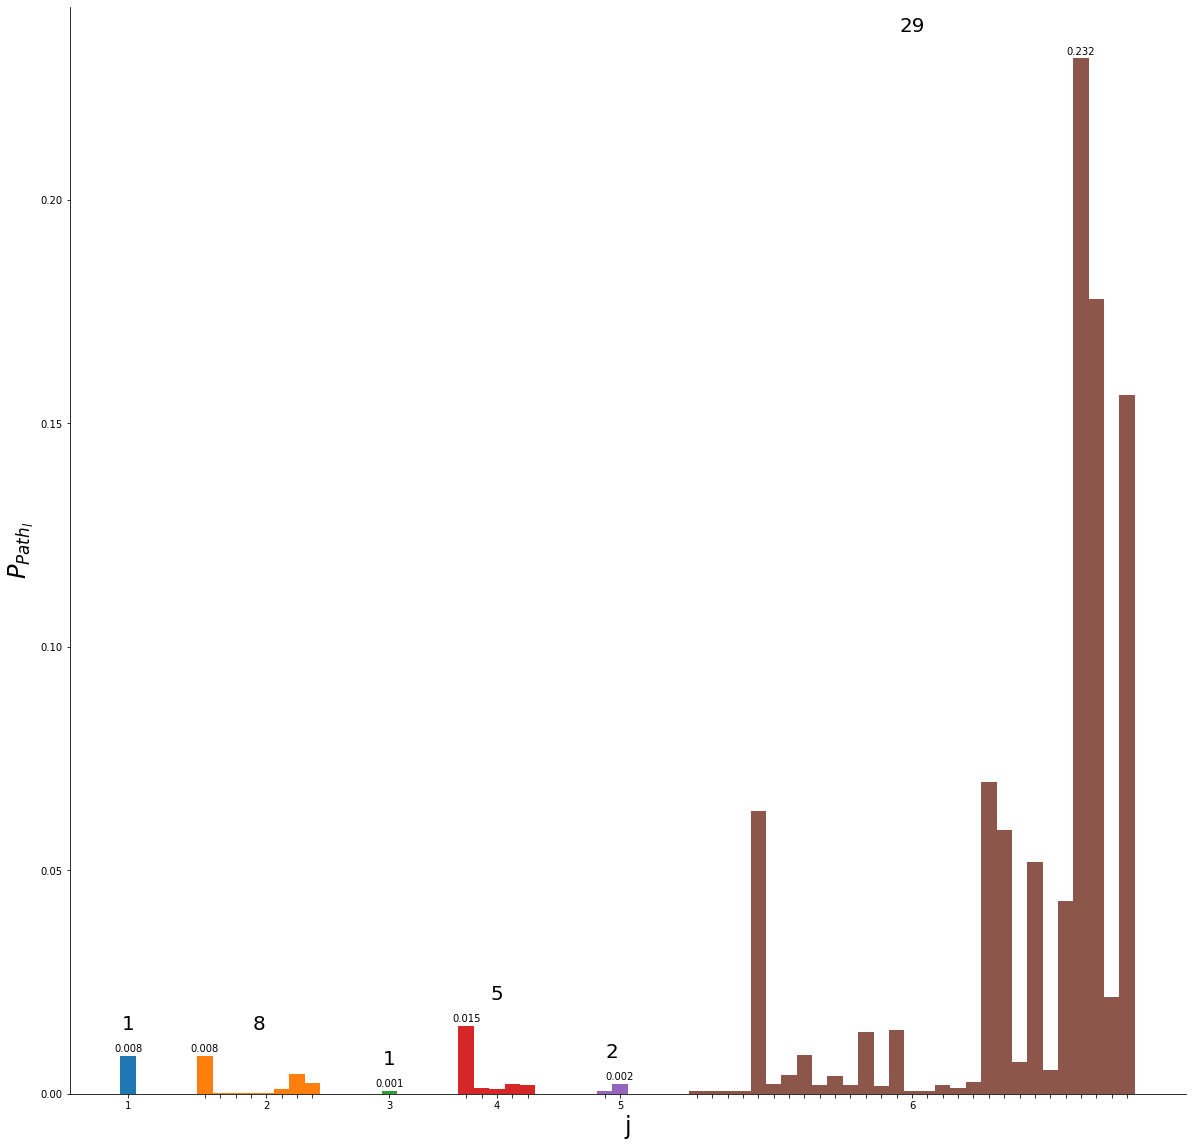

In [12]:
for report in reports:
    report.decision_probability_bar()

[1 2 3 4 5 6]


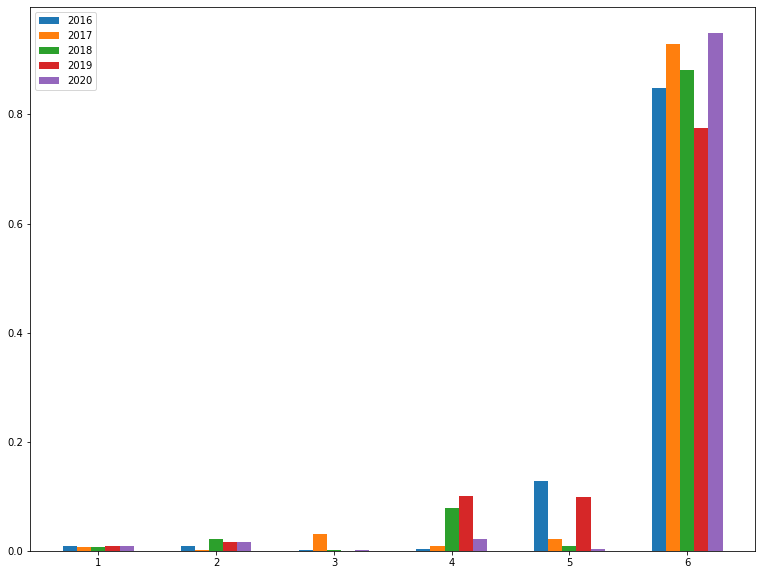

In [13]:
show_hierarchical_risk_bar(reports)

<Figure size 936x720 with 0 Axes>

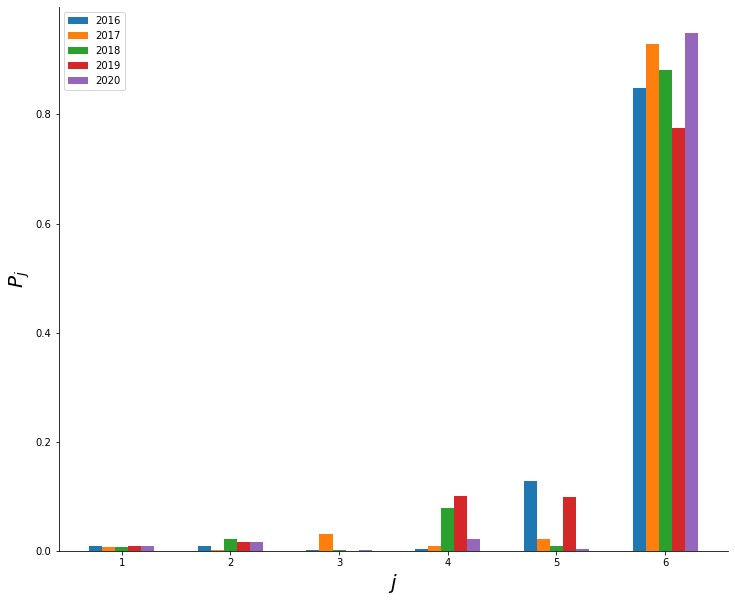

In [34]:
plt.figure(figsize=(13, 10))
fig, axes = plt.subplots(figsize=(12, 10))

x = np.arange(len(reports[0].hierarchical_risk)) + 1
width = 0.12
for i, report in enumerate(reports):
    axes.bar(x + (-2 + i) * width, report.hierarchical_risk,
                width=width, label=report.name)

axes.legend()
axes.set_xlabel(r'$j$', fontsize=20)
axes.set_ylabel(r'$P_j$', fontsize=20)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

plt.show()


In [5]:
"1" == 1

False